<a href="https://colab.research.google.com/github/s17elgho/Salma_projects/blob/main/Basic_Neural_networks_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Basic Neural network implementations in Keras </center>



Try to execute the code with GPU for faster computation

In [1]:
import numpy as np
from keras.layers import Dense, Activation ## layers of the model
from tensorflow.keras.optimizers import SGD ## for learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential ## for building the model

**I - XOR in Keras**

We train a simple Deep learning model to learn to predict XOR function, which is given by :<br>
x1=0, x2=0 ==> output = 0<br>
x1=1, x2=0 ==> output = 1<br>
x1=0, x2=1 ==> output = 1<br>
x1=1, x2=1 ==> output = 0<br>

*We choose the following neural network , feel free to change the architecture<br>
*Input dimension : 2<br>
*Number of neurones in hidden layer : 8 + Relu activation function<vr>
*Output dimension : 1 + Sigmoid activation function in order to have output between 0 and 1 <br>
*We can select SGD as an optimizer with 0.5 as learning rate<br>
*The cost function is a binary crossentropy which is adapted to binary output<br>


In [5]:
X = np.array([[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]])
y = np.array([[0],[1],[1],[0]])
model = Sequential()
model.add(Dense(units = 8, input_dim = 2))
model.add(Activation('relu'))
model.add(Dense(units = 1))
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.5)
model.compile(loss='binary_crossentropy',optimizer = sgd)

Now that the model is built, we can train It for example for 1000 epochs, we can choose batch_size=1

In [6]:

model.fit(X,y, verbose=1, batch_size = 1, epochs = 1000)
print(model.predict(X))

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8090
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7668
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7554
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7263
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7359
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7118
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6921
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6220
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6706
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6445
Epoch 13/1000
4/4 [==============================

The output of the NN after training is so close from the true output we except in XOR function

## II MNIST

In this part, we want to build a model able to classify handwritten digits in MNIST dataset . We construct a simple Neural network. There are 10 classes : digits from 0 to 9

Download the data from Keras

In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.shape


(60000, 28, 28)

Reshape each image into a flattened array of 28*28

In [9]:
train = train_images.reshape(60000, 28*28)

In [10]:
test = test_images.reshape(10000, 28*28)

Normalize entries between 0 and 1

In [11]:
x_train = train.astype("float32") / 255
x_test = test.astype("float32") / 255

We One hot encode the labels so as we could have for each image one vector of dimension 10 as label, in this vector there are zeros everywhere except in the indice of the corresponding class . We use keras.utils.to_categorical to do so

In [12]:
y_train = keras.utils.to_categorical(train_labels, 10) # 10 classes
y_test = keras.utils.to_categorical(test_labels, 10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

We build our model to train on x_train and y_train
We choose a simple architecture :<br>
input dimension : 784 = 28*28 <br>
first hidden layer of dimension 200 + tanh activation function <br>
second hidden layer of dimension 15 + tanh <br>
Output layer : 10 in dimension since we have 10 classes +softmax which is used in multiclass classification <br>


In [14]:
model = Sequential()

model.add(Dense(200, input_dim=784))

model.add(Activation('tanh'))
model.add(Dense(15))
model.add(Activation('tanh'))
model.add(Dense(10))

model.add(Activation('softmax'))
 

We can add a validation set in order to diagnose the model's generalization performance during training. <br>
We select 15 epochs for training <br>
We choose a batch size of 128 <br>
We also show the accuracy on train and validation set <br>
Again , feel free to play with hyperparameters ! <br>

In [15]:
sgd = SGD(lr=0.8)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8728 - val_loss: 0.2115 - val_accuracy: 0.9415
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1975 - accuracy: 0.9411 - val_loss: 0.1375 - val_accuracy: 0.9630
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1487 - accuracy: 0.9551 - val_loss: 0.1455 - val_accuracy: 0.9555
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1182 - accuracy: 0.9643 - val_loss: 0.1140 - val_accuracy: 0.9680
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0986 - accuracy: 0.9705 - val_loss: 0.1258 - val_accuracy: 0.9643
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9743 - val_loss: 0.0928 - val_accuracy: 0.9740
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.1140 - val_accuracy: 0.9698
Epoch 

Here we evaluate model's performance on unseen data

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1065123900771141
Test accuracy: 0.9731000065803528


==> 0.99 accuracy on train 
and 0.97 accuracy on test 

We can have fun plotting some predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7]


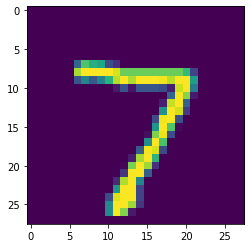

In [17]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(test_images [0])
test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255
img = test_images [0].reshape ((1, 28*28))
print (model.predict_classes(img))

==> correclty predicted example

[0]


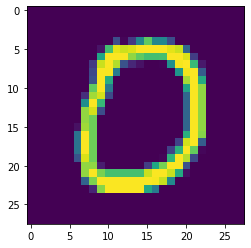

In [18]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [10])
test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255
img = test_images [10].reshape ((1, 28*28))
print (model.predict_classes(img))

Another correctly predicted example

### III- IMDB

Here, we build a model to classify comments on movies . We have a dataset of IMDB containing comments on movies. There are two classes : positive and negative comments. <br>
We build a neural network and train It to fit these two classes <br>
Inspect the data to understand It

In [19]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


We need to one hot encode the comments into 10.000 dimension vectors like we did before with labels in the mnist data. But here we need to write some code ... 


In [20]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
x_train.shape

(25000, 10000)

In [22]:
y_train.shape

(25000,)

We build a model <br>
For example : <br>
Input dimension : 10.000 <br>
hidden layer : 20 neurones + relu <br>
hidden layer : 20 neurones + relu <br>
Output layer : 1 neurone + sigmoid

In [23]:
model = Sequential()

model.add(Dense(20, activation='relu', input_shape=(10000,)))


model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

We add this time a validation data specified by hand. <br>The loss is binary crossentropy because the problem is a binary classification.<br>
We use a different optimizer which is rmsprop

In [24]:

model.compile(optimizer='rmsprop',

loss='binary_crossentropy',

metrics=['accuracy'])
x_val = x_train[:10000]

partial_x_train = x_train[10000:]
 
y_val = y_train[:10000]

partial_y_train = y_train[10000:]
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5012 - accuracy: 0.7891 - val_loss: 0.3921 - val_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2962 - accuracy: 0.9014 - val_loss: 0.3124 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2133 - accuracy: 0.9315 - val_loss: 0.2884 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1673 - accuracy: 0.9449 - val_loss: 0.3124 - val_accuracy: 0.8763
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1353 - accuracy: 0.9565 - val_loss: 0.2854 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1124 - accuracy: 0.9649 - val_loss: 0.3068 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0889 - accuracy: 0.9725 - val_loss: 0.3266 - val_accuracy: 0.8806
Epoch 8/20
30

We can plot validation loss evolution and train loss evolution against epochs in order to check if there is any overfitting or underfitting of our model ... This is also possible for accuracy 

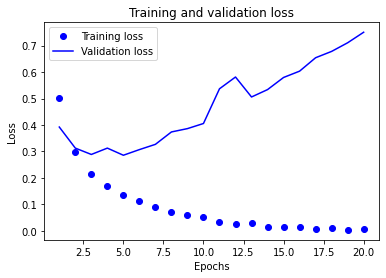

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clearly we have overfitted the train data !!!

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8166372776031494
Test accuracy: 0.8508800268173218


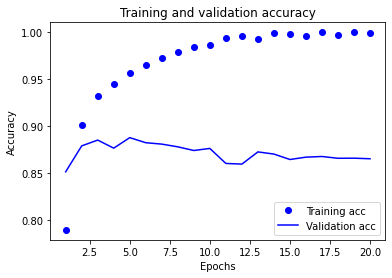

In [27]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The train acc is far better than validation and test accuracy ! We can do better by reducing maybe the complexity of the model :)
